In [5]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
# Import API key
from api_key import geoapify_key

In [6]:
# Load in csv
mental_health_df = pd.read_csv("Resources/clean_data.csv")
#The above code imports the data, but converts numbers into floats automatically
#the below code manually converts those numbers back to integers; it also takes into account rows that were empty or NaN and replace 
#it with a 0
mental_health_df = mental_health_df.dropna()
mental_health_df['Year'] = mental_health_df['Year'].astype(np.int64)
mental_health_df['Population'] = mental_health_df['Population'].astype(np.int64)
# print
mental_health_df.head()


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
0,0.0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000
1,1.0,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000
2,2.0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000
3,3.0,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000
4,4.0,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000


In [7]:
#Drop all years except last 5 and create new data frame 
five_year_clean = mental_health_df[(mental_health_df['Year'] >= 2012) & (mental_health_df['Year'] <= 2017)]
five_year_clean


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
22,22.0,Afghanistan,AFG,2012,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,814832.3036,31161000
23,23.0,Afghanistan,AFG,2013,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,852849.1158,32270000
24,24.0,Afghanistan,AFG,2014,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,884404.6832,33371000
25,25.0,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276,906133.4339,34414000
26,26.0,Afghanistan,AFG,2016,0.166035,0.707686,0.105808,4.878875,2.513553,4.135694,0.661850,932188.7307,35383000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,6463.0,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,303564.6036,13350000
6464,6464.0,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,311665.7693,13587000
6465,6465.0,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,320638.5072,13815000
6466,6466.0,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,330437.3538,14030000


In [33]:
#Average each disorder from remaining years from each country  
#Find the Mean of Schiziphrenia 
Schizophrenia_mean = five_year_clean.groupby(["Entity"]).mean()["Schizophrenia (%)"]
Schizophrenia_mean
 
#Find the Mean of Bipolar Disorder 
bipolar_disorder_mean = five_year_clean.groupby(["Entity"]).mean() ["Bipolar disorder (%)"]

#Find the Mean of Eating Disorders 
eating_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Eating disorders (%)"]

 
#Find the Mean of Anxiety Disorder 
anxiety_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Anxiety disorders (%)"]

#Find the Mean of Drug Use Disorders 
drug_use_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Drug use disorders (%)"]

#Find the Mean of Depression 
depression_mean = five_year_clean.groupby(["Entity"]).mean()["Depression (%)"]


#Find the Mean of Alcohol Use Disorders 
alcohol_use_disorders_mean = five_year_clean.groupby(["Entity"]).mean()["Alcohol use disorders (%)"]

# Create a DataFrame called `Mean_Disorder Data` that breaks down disorder mean by country
# create a list of the series objects
series_list = [Schizophrenia_mean, bipolar_disorder_mean, eating_disorders_mean, anxiety_disorders_mean, drug_use_disorders_mean, depression_mean, alcohol_use_disorders_mean ]

# use pd.concat to concatenate the series objects horizontally
disorder_mean_data = pd.concat(series_list, axis=1)

# Assign new column names to the Tumor_Volume_Data dataframe
disorder_mean_data.columns = ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders' ]

# Display the updated dataframe
disorder_mean_data


,Schizophrenia,Bipolar Disorder,Eating Disorders,Anxiety Disorders,Drug Use Disorders,Depression,Alcohol Use Disorders
Entity,,,,,,,
Afghanistan,0.165805,0.707081,0.103619,4.874300,2.540350,4.134689,0.662099
Albania,0.200481,0.704041,0.169955,3.388445,0.511595,2.204725,1.847238
Algeria,0.197642,0.817575,0.210688,5.056578,1.704862,3.635739,0.665424
American Samoa,0.249050,0.468437,0.179265,3.316162,0.769095,2.937679,1.140915
Andorra,0.263749,0.963786,0.648336,5.310556,0.904643,3.727690,1.250189
...,...,...,...,...,...,...,...
Vietnam,0.242382,0.551291,0.122736,2.049616,0.680855,2.882866,1.729482
World,0.254472,0.595857,0.206738,3.776508,0.928238,3.440192,1.415836
Yemen,0.172509,0.735449,0.136990,4.851539,1.395040,4.017605,0.636085


In [9]:
# Pull top 5 highest countries for each disorder and place in a data frame called country_top5_disordername

#Pulls  schizophrenia data from top 5 rows and prints df
country_top5_schizophrenia = disorder_mean_data['Schizophrenia'].nlargest(5, keep='all').to_frame()
country_top5_schizophrenia


,Schizophrenia
Entity,
Netherlands,0.366080
Australia,0.364333
New Zealand,0.341022
United States,0.335471
China,0.335417


In [10]:

#Pulls Bipolar Disorder  data from top 5 rows and prints df
country_top5_bipolar_disorder = disorder_mean_data['Bipolar Disorder'].nlargest(5, keep='all').to_frame()
country_top5_bipolar_disorder


,Bipolar Disorder
Entity,
New Zealand,1.206409
Australia,1.145573
Brazil,1.106874
United Kingdom,1.085889
Paraguay,1.074642


In [11]:
#Pulls Eating Disorders  data from top 5 rows and prints df
country_top5_eating_disorders = disorder_mean_data['Eating Disorders'].nlargest(5, keep='all').to_frame()
country_top5_eating_disorders

,Eating Disorders
Entity,
Australia,0.941146
Luxembourg,0.736903
Spain,0.730888
Austria,0.673890
New Zealand,0.668440


In [12]:
#Pulls Anxiety Disorders  data from top 5 rows and prints df
country_top5_anxiety_disorders = disorder_mean_data['Anxiety Disorders'].nlargest(5, keep='all').to_frame()
country_top5_anxiety_disorders

,Anxiety Disorders
Entity,
New Zealand,8.539090
Norway,7.598662
Iran,7.059120
United States,6.656907
France,6.640397


In [13]:
#Pulls Drug Use  data from top 5 rows and prints df
country_top5_druguse_disorders = disorder_mean_data['Drug Use Disorders'].nlargest(5, keep='all').to_frame()
country_top5_druguse_disorders

,Drug Use Disorders
Entity,
United States,3.235410
United Arab Emirates,2.991243
Libya,2.570853
Afghanistan,2.540350
Canada,2.223147


In [65]:
#Pulls Depression  data from top 50 rows and prints df
country_top50_depression = disorder_mean_data['Depression'].nlargest(50, keep='all').to_frame()
country_top50_depression

,Depression
Entity,
Greenland,6.322531
Lesotho,5.628543
Morocco,5.543012
Iran,5.027941
Uganda,5.014792
Finland,4.870164
United States,4.794134
Palestine,4.754172
Australia,4.710230


In [15]:
#Pulls Drug Use  data from top 5 rows and prints df
country_top5_alcohol_use_disorders = disorder_mean_data['Alcohol Use Disorders'].nlargest(5, keep='all').to_frame()
country_top5_alcohol_use_disorders

,Alcohol Use Disorders
Entity,
Belarus,5.416025
Russia,5.049632
Estonia,4.870442
Ukraine,4.839416
Lithuania,4.497348


In [16]:
## Pull lowest 5 in each disorder cat and display in data frame 

##Pulls schizophrenia  data from bottom 5 rows and prints df

country_low5_schizophrenia= disorder_mean_data['Schizophrenia'].nsmallest(5, keep='all').to_frame()
country_low5_schizophrenia



,Schizophrenia
Entity,
Central African Republic,0.148714
Burundi,0.153694
Somalia,0.153798
Malawi,0.154049
Mozambique,0.155422


In [17]:
#Pulls Bipolar Disorder  data from bottom 5 rows and prints df
country_low5_bipolar_disorder = disorder_mean_data['Bipolar Disorder'].nsmallest(5, keep='all').to_frame()
country_low5_bipolar_disorder


,Bipolar Disorder
Entity,
China,0.322098
North Korea,0.326226
Taiwan,0.352372
Papua New Guinea,0.410855
Kiribati,0.423930


In [18]:
#Pulls Eating Disorders  data from bottom 5 rows and prints df
country_low5_eating_disorders = disorder_mean_data['Eating Disorders'].nsmallest(5, keep='all').to_frame()
country_low5_eating_disorders

,Eating Disorders
Entity,
Somalia,0.078931
Democratic Republic of Congo,0.086379
Liberia,0.088981
Burundi,0.089058
North Korea,0.090505


In [19]:
#Pulls Anxiety Disorders  data from top 5 rows and prints df
country_low5_anxiety_disorders = disorder_mean_data['Anxiety Disorders'].nsmallest(5, keep='all').to_frame()
country_low5_anxiety_disorders

,Anxiety Disorders
Entity,
Vietnam,2.049616
Colombia,2.514806
Tajikistan,2.519942
Mongolia,2.548185
Uzbekistan,2.555317


In [20]:
#Pulls Drug Use  data from bottom 5 rows and prints df
country_low5_druguse_disorders = disorder_mean_data['Drug Use Disorders'].nsmallest(5, keep='all').to_frame()
country_low5_druguse_disorders

,Drug Use Disorders
Entity,
Bosnia and Herzegovina,0.433476
Burkina Faso,0.434519
Mali,0.438236
Guinea,0.445840
Serbia,0.448222


In [21]:
#Pulls Depression  data from low 5 rows and prints df
country_low5_depression = disorder_mean_data['Depression'].nsmallest(5, keep='all').to_frame()
country_low5_depression

,Depression
Entity,
Colombia,2.199645
Albania,2.204725
Poland,2.265219
Peru,2.267150
Myanmar,2.279740


In [31]:
#Pulls Drug Use  data from low 5 rows and prints df
country_low5_alcohol_use_disorders = disorder_mean_data['Alcohol Use Disorders'].nsmallest(5, keep='all').to_frame()
country_low5_alcohol_use_disorders

,Alcohol Use Disorders
Entity,
Italy,0.465618
Singapore,0.482052
Israel,0.504927
Morocco,0.574383
Japan,0.575655


In [66]:
#Pull top 5 countries with depression alcohol and drug use disorder data 
country_top50_drug_alcohol_data = disorder_mean_data.loc[country_top50_depression.index, ['Depression', 'Drug Use Disorders', 'Alcohol Use Disorders']]
country_top50_drug_alcohol_data


,Depression,Drug Use Disorders,Alcohol Use Disorders
Entity,,,
Greenland,6.322531,1.948853,3.202441
Lesotho,5.628543,0.766470,1.668987
Morocco,5.543012,1.615582,0.574383
Iran,5.027941,2.013798,0.583080
Uganda,5.014792,0.538584,1.291678
Finland,4.870164,0.922622,2.714755
United States,4.794134,3.235410,2.017700
Palestine,4.754172,1.517148,0.648435
Australia,4.710230,2.156435,1.508990


                       Depression  Drug Use Disorders  Alcohol Use Disorders
Depression               1.000000            0.295890               0.006602
Drug Use Disorders       0.295890            1.000000              -0.105062
Alcohol Use Disorders    0.006602           -0.105062               1.000000


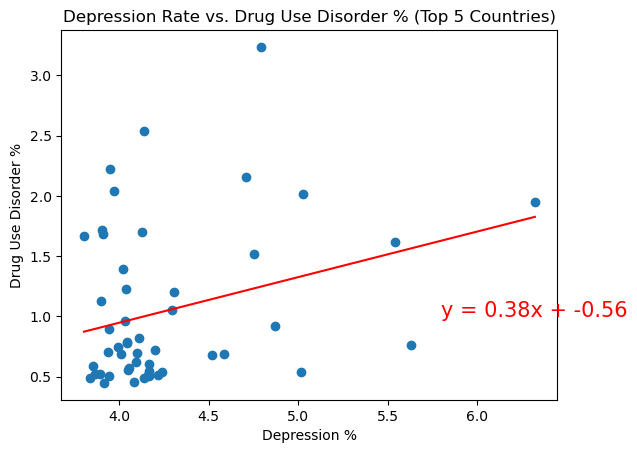

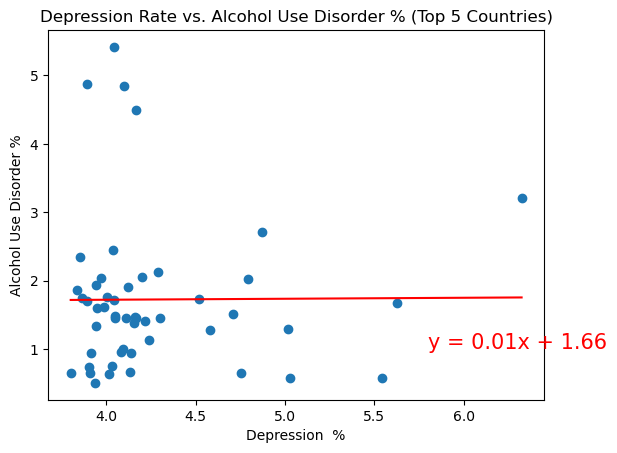

In [67]:
import scipy.stats as st

# Generate a scatter plot showing the total number of drug and alcohol use disorders reported for top 5 depression countries using Pandas.
#Calculate correatlions (r) to see if there is meaningful correlation (>.6)
corr_depression = country_top50_drug_alcohol_data[['Depression', 'Drug Use Disorders', 'Alcohol Use Disorders']].corr()
print(corr_depression)

# Create scatter plots to visualize the correlation between the depression with drug use  disorder rates
dep_data = country_top50_drug_alcohol_data['Depression']
druguse_data = country_top50_drug_alcohol_data['Drug Use Disorders']
plt.scatter(country_top50_drug_alcohol_data['Depression'], country_top50_drug_alcohol_data['Drug Use Disorders'])
plt.title('Depression Rate vs. Drug Use Disorder % (Top 5 Countries)')
plt.xlabel('Depression %')
plt.ylabel('Drug Use Disorder %')

# Plot the regression line
# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(dep_data, druguse_data)
regress_values = dep_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dep_data,regress_values,"r-")
# Plot the regression line
plt.annotate(line_eq,(5.8,1),fontsize=15,color="red")

plt.show()


# Create scatter plots to visualize the correlation between the depression and alcohol use disorder rates
alcuse_data = country_top50_drug_alcohol_data['Alcohol Use Disorders']
plt.scatter(country_top50_drug_alcohol_data['Depression'], country_top50_drug_alcohol_data['Alcohol Use Disorders'])
plt.title('Depression Rate vs. Alcohol Use Disorder % (Top 5 Countries)')
plt.xlabel('Depression  %')
plt.ylabel('Alcohol Use Disorder %')

# Plot the regression line
# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(dep_data, alcuse_data)
regress_values = dep_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dep_data,regress_values,"r-")
# Plot the regression line
plt.annotate(line_eq,(5.8,1),fontsize=15,color="red")


plt.show()



                       Depression  Drug Use Disorders  Alcohol Use Disorders
Depression               1.000000           -0.418803              -0.539611
Drug Use Disorders      -0.418803            1.000000               0.391938
Alcohol Use Disorders   -0.539611            0.391938               1.000000


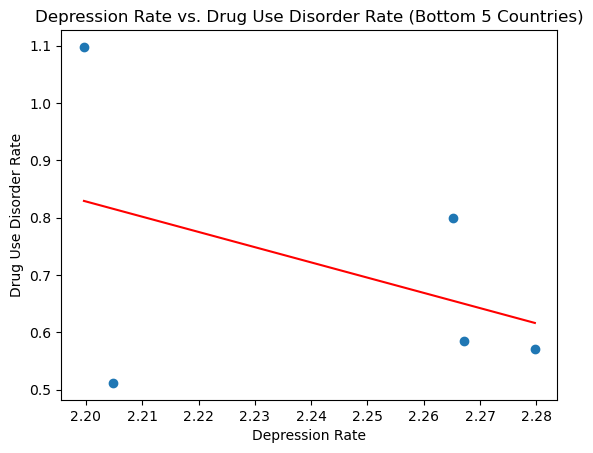

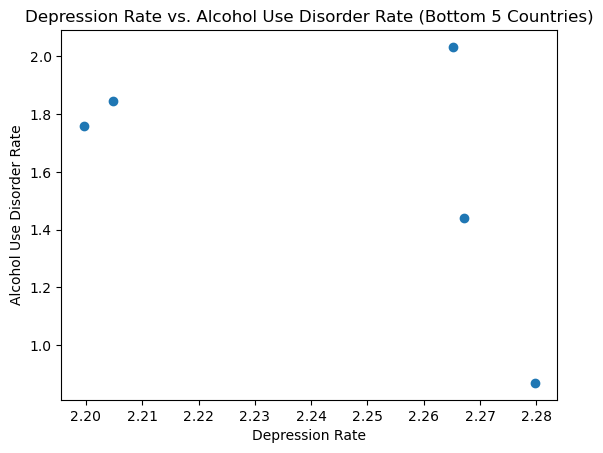

In [62]:
#Pull bottom 5 countries with depression alcohol and drug use disorder data 
country_bottom5_drug_alcohol_data = disorder_mean_data.loc[country_low5_depression.index, ['Depression', 'Drug Use Disorders', 'Alcohol Use Disorders']]
country_bottom5_drug_alcohol_data

# Create scatter plots to visualize the correlation between the depression with drug use  disorder rates
dep_data = country_bottom5_drug_alcohol_data['Depression']
druguse_data = country_bottom5_drug_alcohol_data['Drug Use Disorders']

# Generate a scatter plot showing the total number of drug and alcohol use disorders reported for top 5 depression countries using Pandas.
corr_depression = country_bottom5_drug_alcohol_data[['Depression', 'Drug Use Disorders', 'Alcohol Use Disorders']].corr()
print(corr_depression)

# Calculate Regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(dep_data, druguse_data)
regress_values = dep_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dep_data,regress_values,"r-")


# Plot the regression line
plt.annotate(line_eq,(5.8,1),fontsize=15,color="red")

# Create scatter plots to visualize the correlation between the depression with drug use  disorder rates
plt.scatter(country_bottom5_drug_alcohol_data['Depression'], country_bottom5_drug_alcohol_data['Drug Use Disorders'])
plt.title('Depression Rate vs. Drug Use Disorder Rate (Bottom 5 Countries)')
plt.xlabel('Depression Rate')
plt.ylabel('Drug Use Disorder Rate')
plt.show()

# Create scatter plots to visualize the correlation between the depression and alcohol use disorder rates
plt.scatter(country_bottom5_drug_alcohol_data['Depression'], country_bottom5_drug_alcohol_data['Alcohol Use Disorders'])
plt.title('Depression Rate vs. Alcohol Use Disorder Rate (Bottom 5 Countries)')
plt.xlabel('Depression Rate')
plt.ylabel('Alcohol Use Disorder Rate')
plt.show()
